# Analyse univariée

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

df = pd.read_csv('data.csv')

In [2]:
df.describe(include='all')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,58715,58715,58521,39149,58715,44889,58715.000000,41956.000000,58715.000000,41908.000000,58715.000000,42740.000000,58715.000000,58715.000000,58715.000000
unique,58715,49275,12225,36698,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://world-fr.openfoodfacts.org/produit/3564...,Mayonnaise,Carrefour,Semoule de _blé_ dur de qualité supérieure.,d,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,42,2246,102,16484,7431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,270.435777,13.559997,5.462013,27.937053,13.591967,2.470432,7.844022,1.064835,8.802487
std,NaN,NaN,NaN,NaN,NaN,NaN,181.310849,16.524503,8.321186,27.148598,19.121329,3.974412,7.682181,3.529392,9.041600
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,108.030593,1.600000,0.300000,4.200000,1.000000,0.000000,2.100000,0.090000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,253.346080,7.300000,2.000000,15.000000,4.200000,1.400000,6.000000,0.580000,9.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,397.944551,21.700000,7.500000,53.100000,18.400000,3.200000,11.000000,1.250000,16.000000


In [3]:
df.shape

(58715, 15)

## 1/ Quelle est la répartition des produits par catégorie ? 

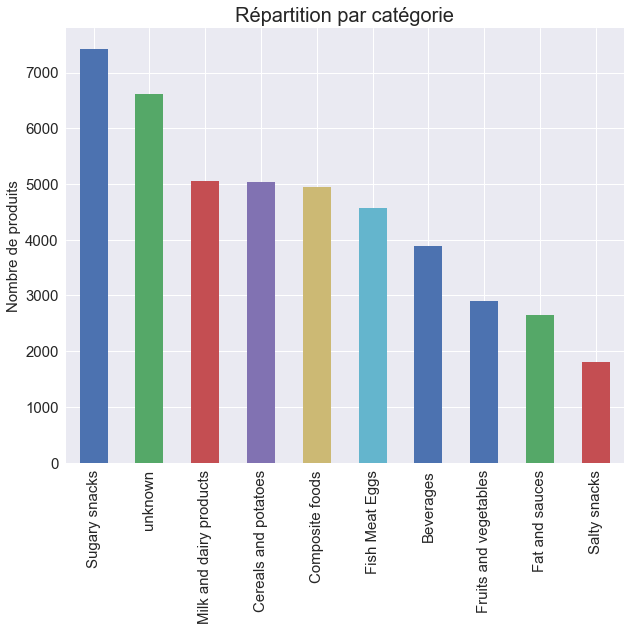

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

df['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

In [5]:
cat_unknown = len(df[df['pnns_groups_1'] == 'unknown'])
cat_null = len(df[df['pnns_groups_1'].isnull()])
print(f"{(cat_unknown + cat_null) / df.shape[0] * 100:.0f}% des produits sont sans catégories.")

35% des produits sont sans catégories.


Autrement, la répartition des catégories est plutôt homogène et toutes les catégories sont suffisamment représentées. La plupart ont entre 3000 et 5000 produits. 

## 2/ Quelles sont les marques les plus représentées ?

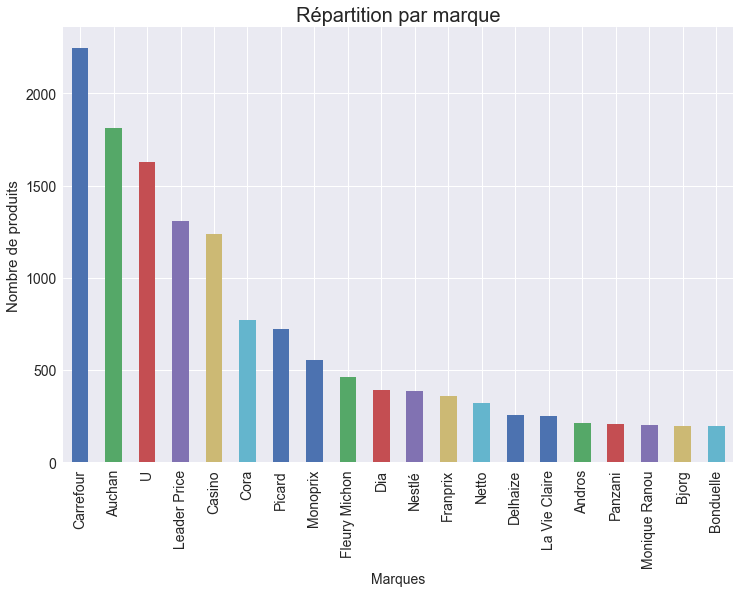

In [6]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
df['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

Les grandes enseignes de distribution sont les plus représentées (Carrefour, Auchan, U, Leader Price), mais on retrouve aussi des marques de produits (Fleury Michon, Nestlé, Andros).

## 3/ Quelle est la répartition des notes (entre A et E) des produits ? 

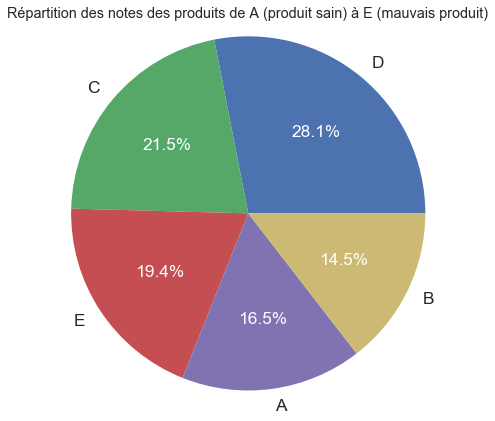

In [7]:
grades = df['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, autotexts = ax.pie(grades.values, labels=grades.index, autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size('xx-large')
for t in autotexts: 
    t.set_size('xx-large')
    t.set_color('w')
ax.set_title('Répartition des notes des produits de A (produit sain) à E (mauvais produit)', size='x-large')
ax.axis('equal')

plt.show()

La répartition est homogène entre les différentes notes.

## 4/ Apport énergétique

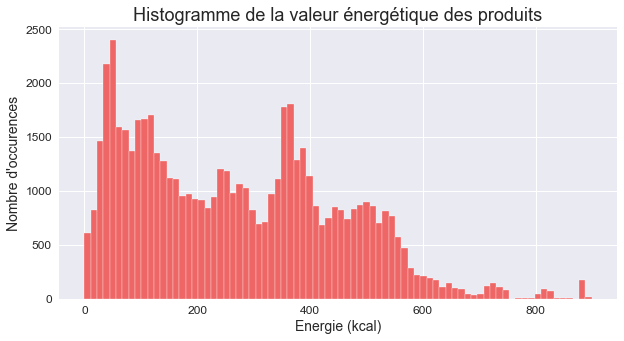

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['energy_100g'], bins=80, histtype='bar', color='#EE6666', edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size=18)
ax.set_xlabel("Energie (kcal)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

On observe une distribution plutôt de type pluri-modale (des pics autour de 60, 120, 250 ou 370 calories) et excentrée vers la gauche avec la plupart des produits en dessous de 550kcal.

In [9]:
df.nlargest(10, 'energy_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
46205,http://world-fr.openfoodfacts.org/produit/3760...,Huile D'olive,Bronzini,NaN,e,NaN,898.900574,NaN,17.0,NaN,0.0,0.0,0.0,0.000,20.0
48657,http://world-fr.openfoodfacts.org/produit/5013...,Pure coconut oil,Ktc,NaN,e,NaN,898.900574,NaN,95.5,NaN,0.0,0.0,0.2,0.500,22.0
57378,http://world-fr.openfoodfacts.org/produit/8711...,Kokosolie Extra Virgin,Ekoplaza,Biologische kokosolie (100%),d,Fat and sauces,898.661568,100.0,91.0,0.0,0.0,0.0,0.0,0.000,15.0
4408,http://world-fr.openfoodfacts.org/produit/2700...,El cultivador,El cultivador,NaN,e,Fat and sauces,897.944551,NaN,14.0,NaN,0.0,0.0,0.0,0.000,20.0
21965,http://world-fr.openfoodfacts.org/produit/3259...,Huile d'olive bio,Soleou,NaN,e,NaN,897.944551,NaN,13.8,NaN,0.0,0.0,0.0,0.001,20.0
31259,http://world-fr.openfoodfacts.org/produit/3368...,"Huile D'olive à L'ail Et Au Romarin U Saveurs,",U saveurs,NaN,e,NaN,897.944551,NaN,13.8,NaN,0.0,0.0,0.0,0.000,20.0
47612,http://world-fr.openfoodfacts.org/produit/4032...,Ghee,Cosmoveda,NaN,e,NaN,897.944551,NaN,65.0,NaN,0.0,0.0,0.0,0.000,20.0
48761,http://world-fr.openfoodfacts.org/produit/5019...,Butter ghee (beurre clarifié),Khanum,"Matières grasses butyriques 99,8 % minimum Hum...",e,Fat and sauces,897.944551,99.8,63.3,0.1,0.1,NaN,0.1,0.100,19.0
46265,http://world-fr.openfoodfacts.org/produit/3760...,Huile D'olive Saveur Ail Et Poivron,Savora,NaN,e,NaN,896.032505,NaN,14.0,NaN,0.1,0.0,0.1,0.100,20.0
47986,http://world-fr.openfoodfacts.org/produit/4260...,Foodspring Coconut Oil,Foodspring,NaN,e,NaN,896.032505,NaN,93.0,NaN,0.1,0.0,0.1,0.000,20.0


Les produits les plus caloriques sont les huiles et beurres composés principalement de lipides (nutriments les plus denses).

In [10]:
# On exclue les entrées à 0 calories qui peuvent être juste un champ non renseigné.
df[df['energy_100g'] > 0].nsmallest(10, 'energy_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
34741,http://world-fr.openfoodfacts.org/produit/3502...,Free,7UP,"Eau gazéifiée, acidifiants (acide citrique, ac...",b,Beverages,0.143403,0.0,0.0,0.0,0.0,NaN,0.0,0.0400,1.0
51850,http://world-fr.openfoodfacts.org/produit/5449...,Coca-Cola Zero,Coca-Cola,"eau gazéifiée , colorant: caramel (E150d) , ac...",b,Beverages,0.215105,0.0,0.0,0.0,0.0,NaN,0.0,0.0200,1.0
48156,http://world-fr.openfoodfacts.org/produit/5000...,CocaCola zero,Coca-Cola,NaN,b,Beverages,0.219885,0.0,0.0,0.0,0.0,NaN,0.0,0.0200,1.0
7705,http://world-fr.openfoodfacts.org/produit/3068...,Sans sucres Agrumes,"La Salvetat,Salvetat",Eau minérale naturelle gazéifiée à la Salvetat...,a,Beverages,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0100,1.0
7708,http://world-fr.openfoodfacts.org/produit/3068...,Badoit Citron,"Badoit,Danone","Eau minérale naturelle gazéifiée Badoit 99.9%,...",a,Beverages,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0450,1.0
7712,http://world-fr.openfoodfacts.org/produit/3068...,Badoit Framboise,Badoit,"Eau minérale naturelle gazéifiée Badoit 99.9%,...",a,Beverages,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0450,1.0
27308,http://world-fr.openfoodfacts.org/produit/3278...,Coca-cola zéro,Coca-Cola,"Eau gazéifiée, colorant : caramel (E150d), aci...",b,Beverages,0.239006,NaN,0.0,0.0,0.0,0.0,0.0,0.0254,1.0
34742,http://world-fr.openfoodfacts.org/produit/3502...,Pepsi light décaféiné,Pepsi,"Eau gazéifiée, colorant (caramel E150d), acidi...",b,Beverages,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0100,1.0
41557,http://world-fr.openfoodfacts.org/produit/3596...,Limonade Zero,Auchan,NaN,b,unknown,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0100,1.0
48147,http://world-fr.openfoodfacts.org/produit/5000...,Coca-Cola Light,Coca-Cola,Eau gazéifiée ; colorant : E150d ; acidifiants...,b,Beverages,0.239006,0.0,0.0,0.0,0.0,NaN,0.0,0.0000,1.0


Les produits les moins caloriques sont les boissons, composées principalement d'eau.

## 5/ Macro-nutriments (lipides, glucides, protéines, fibres)

### a/ Lipides

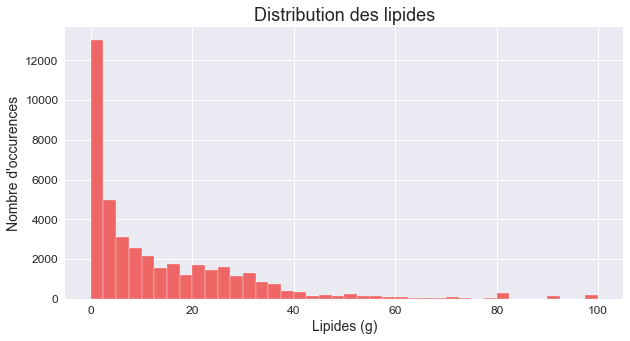

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['fat_100g'].dropna(), bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des lipides", size=18)
ax.set_xlabel("Lipides (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

La majorité des produits contiennent peu de lipides. La distribution est très excentrée vers la gauche. Mais il faut surtout regarder les graisses saturées, critère essentiel à surveiller pour une alimentation saine.

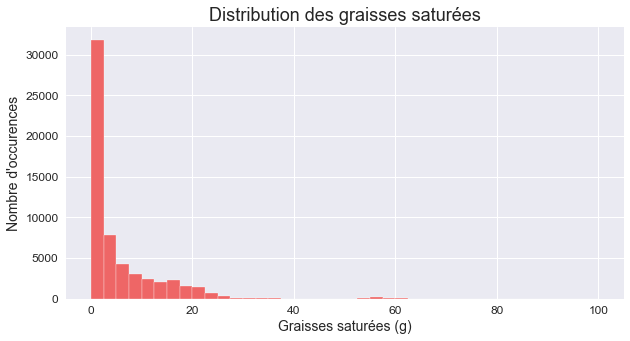

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['saturated-fat_100g'], bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des graisses saturées", size=18)
ax.set_xlabel("Graisses saturées (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

Là aussi la distribution est très excentrée vers la gauche. Regardons les produits contenant le plus de graisses saturées.

In [13]:
# Filtre sur le nombre de calories pour éviter les erreurs sur le taux de graisses saturées
df[df['energy_100g'] > 500].nlargest(10, 'saturated-fat_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1590,http://world-fr.openfoodfacts.org/produit/2002...,Frites & Fritures,Vita d'Or,Huile de coprah totalement hydrogénée,e,Fat and sauces,884.321224,100.0,100.0,0.0,0.0,NaN,0.0,0.0000,20.0
3696,http://world-fr.openfoodfacts.org/produit/2600...,Jog'Frit,Jog'Frit,Huile de noix de coco totalement hydrogénée.,e,Fat and sauces,884.321224,100.0,100.0,0.0,0.0,NaN,0.0,0.0000,20.0
49482,http://world-fr.openfoodfacts.org/produit/5158...,Végétaline (offre familiale),Végétaline,NaN,d,Fat and sauces,884.321224,100.0,100.0,0.0,0.0,NaN,0.0,0.0000,15.0
49602,http://world-fr.openfoodfacts.org/produit/5400...,Carrefour Bio,Huile De Coco,NaN,e,NaN,885.994264,NaN,96.0,NaN,0.5,0.0,0.5,0.1000,20.0
48657,http://world-fr.openfoodfacts.org/produit/5013...,Pure coconut oil,Ktc,NaN,e,NaN,898.900574,NaN,95.5,NaN,0.0,0.0,0.2,0.5000,22.0
47960,http://world-fr.openfoodfacts.org/produit/4260...,Huile de coco,Danlee,Huile de coco vierge.,e,Fat and sauces,858.030593,100.0,93.8,0.0,0.0,NaN,0.0,0.0000,20.0
47661,http://world-fr.openfoodfacts.org/produit/4038...,Kokosnussöl,Govinda,NaN,e,NaN,886.950287,NaN,93.1,NaN,0.1,0.8,0.1,0.0100,19.0
27906,http://world-fr.openfoodfacts.org/produit/3291...,Huile vierge de noix de coco,Emile Noël,huile vierge de noix de coco (dont acide lauri...,e,Fat and sauces,884.321224,100.0,93.0,0.0,0.0,0.0,0.0,0.0250,20.0
27907,http://world-fr.openfoodfacts.org/produit/3291...,Huile vierge de noix de coco,Émile Noël,NaN,d,Fat and sauces,884.321224,100.0,93.0,0.0,0.0,0.0,0.0,0.0254,15.0
27930,http://world-fr.openfoodfacts.org/produit/3291...,Huile de noix de coco biologique goût neutre,Émile noël,Huile de coco 100 %,d,Fat and sauces,884.321224,100.0,93.0,0.0,0.0,NaN,0.0,0.0000,15.0


Le produit le plus nocif en termes de taux de graisses saturées est l'huile de coco. A éviter dans une alimentation saine.

### b/ Glucides

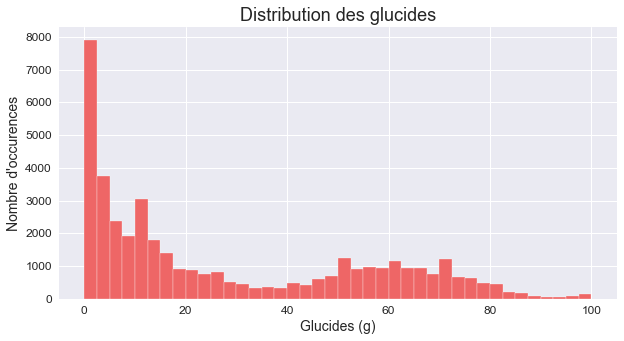

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['carbohydrates_100g'].dropna(), bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des glucides", size=18)
ax.set_xlabel("Glucides (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)


plt.show()

La distribution est légèrement bi-modale. La majorité des produits contiennent peu de glucides. Dans le cadre d'une alimentation équilibrée, il faut surtout regarder les sucres.

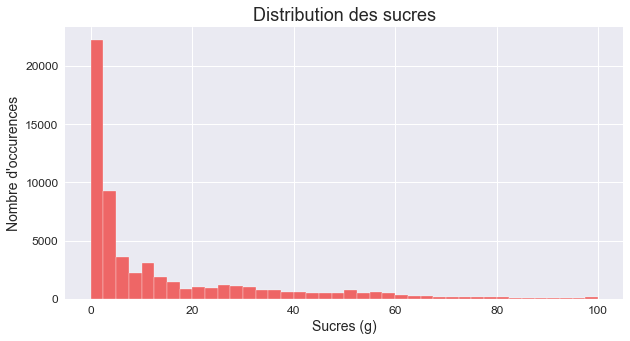

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['sugars_100g'], bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des sucres", size=18)
ax.set_xlabel("Sucres (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

On retrouve un peu la même distribution que celle des graisses saturées, la plupart des produits ont un taux de sucre relativement faible. 

In [16]:
# Filtre sur le nombre de calories pour éviter d'avoir uniquement les sucres purs
# qui contiennent 100g de sucres, soit environ 400 calories
df[df['energy_100g'] > 450].nlargest(10, 'sugars_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
57228,http://world-fr.openfoodfacts.org/produit/8710...,De Ruijter,De Ruijter,NaN,e,NaN,460.086042,NaN,9.0,NaN,77.0,1.0,6.0,1.00000,26.0
16417,http://world-fr.openfoodfacts.org/produit/3250...,ChOc Bonbons de chocolat au lait,Netto,"Sucre, beurre de cacao, lait entier en poudre,...",e,Sugary snacks,473.948375,16.0,8.8,78.0,76.0,1.3,3.2,0.03048,22.0
7773,http://world-fr.openfoodfacts.org/produit/3073...,Vermicelles Multicolores,Cacao Barry,"Sucre, beurre de cacao, pâte de cacao, poudre ...",e,unknown,471.080306,18.0,11.0,75.0,75.0,NaN,1.8,0.03000,25.0
28614,http://world-fr.openfoodfacts.org/produit/3307...,Castellane biscuiterie canistrelli au citron,Castellane Biscuiterie,NaN,d,NaN,454.110899,NaN,1.4,NaN,75.0,2.0,7.0,0.60000,16.0
48803,http://world-fr.openfoodfacts.org/produit/5022...,Creme Brulee Flavour White Hot Chocolate,Whittard,NaN,e,NaN,460.086042,NaN,9.1,NaN,74.4,0.0,4.2,0.65000,26.0
48091,http://world-fr.openfoodfacts.org/produit/4901...,Salted Rice Cracker,Kameda crisps,NaN,e,NaN,467.017208,NaN,1.4,NaN,74.0,0.0,4.3,1.60000,22.0
57006,http://world-fr.openfoodfacts.org/produit/8593...,Lentilky,"Orion,Nestlé","Chocolat au lait 53% (sucre, pâte de cacao, _l...",e,Sugary snacks,478.967495,17.7,11.2,74.5,72.9,1.6,4.1,0.10000,23.0
50708,http://world-fr.openfoodfacts.org/produit/5410...,Biscuit Caramélisé Lotus,Lotus,NaN,e,unknown,483.986616,NaN,19.0,NaN,72.7,1.3,4.9,0.92000,29.0
51106,http://world-fr.openfoodfacts.org/produit/5411...,Spéculoos 335G,Belbis,NaN,e,NaN,482.074570,NaN,18.4,NaN,72.4,0.0,6.7,0.60000,28.0
50427,http://world-fr.openfoodfacts.org/produit/5410...,Vermicelles,Kwata,NaN,e,unknown,450.047801,NaN,9.1,NaN,72.0,0.0,5.7,0.12000,24.0


Les produits les plus sucrés (hors sucres purs) sont principalement des produits transformés sucrés (biscuits, bonbons, pâtes à tartiner).

### c/ Protéines

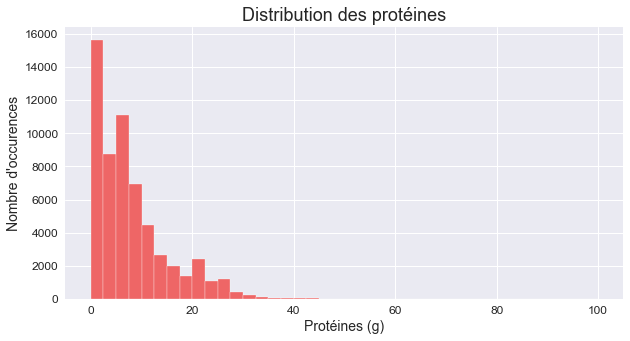

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['proteins_100g'].dropna(), bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des protéines", size=18)
ax.set_xlabel("Protéines (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)


plt.show()

Encore une fois, une distribution très excentrée vers la gauche et la plupart des produits contiennent moins de 30% de protéines.

### d/ Fibres

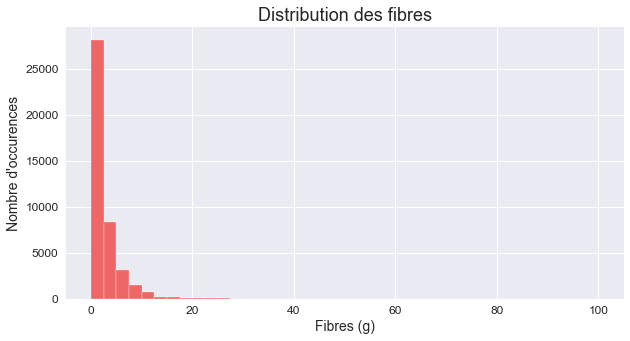

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['fiber_100g'].dropna(), bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 100))
ax.set_title("Distribution des fibres", size=18)
ax.set_xlabel("Fibres (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

Distribution excentrée vers la gauche et concentrée entre 0 et 5g.

### e/ Sel

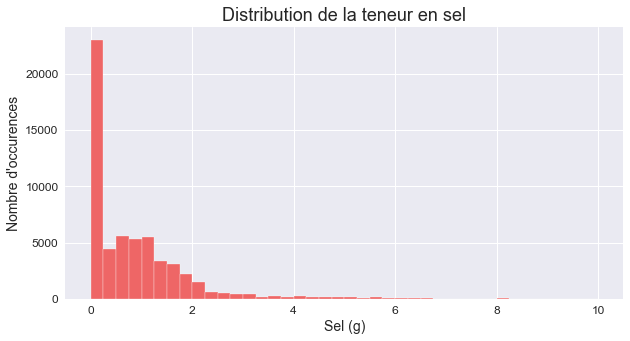

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['salt_100g'].dropna(), bins=40, histtype='bar', color='#EE6666', edgecolor='white', range=(0, 10))
ax.set_title("Distribution de la teneur en sel", size=18)
ax.set_xlabel("Sel (g)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

La plupart des aliments ont une teneur en sel inférieure à 2g. La distribution est aussi excentrée vers la gauche.

In [20]:
df.nlargest(10, 'salt_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
10028,http://world-fr.openfoodfacts.org/produit/3166...,Moulin Sel de Guérande,Ducros,Sel marin gris de table de Guérande.,c,unknown,1.912046,NaN,0.1,NaN,0.0,0.0,0.08,100.0,10.0
11513,http://world-fr.openfoodfacts.org/produit/3183...,Véritable sel de mer la baleine,La baleine,NaN,c,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,0.00,100.0,10.0
14596,http://world-fr.openfoodfacts.org/produit/3245...,Sel de Guérande,Reflets de France,sel de Guérande IGP 100%,c,unknown,0.000000,NaN,0.0,NaN,0.0,0.0,0.00,100.0,10.0
17057,http://world-fr.openfoodfacts.org/produit/3250...,Sel fin de Guerande,Itineraires des saveurs,NaN,c,unknown,0.000000,NaN,0.0,NaN,0.0,0.0,0.00,100.0,10.0
22334,http://world-fr.openfoodfacts.org/produit/3263...,Sel fin iodé - sel de mer,Leader Price,"sel de mer, iodate de potassium (15 à 20mg/kg)...",c,unknown,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,100.0,10.0
22335,http://world-fr.openfoodfacts.org/produit/3263...,Fleur de sel de Guérande,Franprix,NaN,c,unknown,0.000000,NaN,0.0,NaN,0.0,0.0,0.00,100.0,10.0
29792,http://world-fr.openfoodfacts.org/produit/3346...,Saliere sel fin,Les mousquetaires,NaN,c,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,0.00,100.0,10.0
33471,http://world-fr.openfoodfacts.org/produit/3445...,Sel de Guérande,Le guerandais,Sel de Guérande.,c,unknown,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,100.0,10.0
40041,http://world-fr.openfoodfacts.org/produit/3564...,Sel fin de Guérande,Nos regions ont du talent,Sel marin gris alimentaire / Sel de Guérande (...,c,unknown,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,100.0,10.0
40123,http://world-fr.openfoodfacts.org/produit/3564...,Sel Fin de l'Île de Ré,"Nos Régions ont du Talent,Leclerc",Sel marin gris.,c,unknown,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,100.0,10.0


Pas de surprises, les produits les plus salés sont.. les sels :) 

## 6/ Score nutritionnel

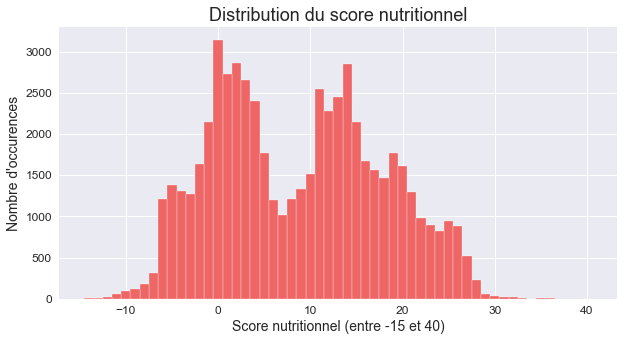

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x=df['nutrition-score-fr_100g'].value_counts().index, 
       height=df['nutrition-score-fr_100g'].value_counts(), 
       color='#EE6666', edgecolor='white', width=1)

ax.set_title("Distribution du score nutritionnel", size=18)
ax.set_xlabel("Score nutritionnel (entre -15 et 40)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

La distribution est de type bi-modale avec un mode autour de 0 et l'autre autour de 13.

In [22]:
df.nsmallest(10, 'nutrition-score-fr_100g')

,url,product_name,brands,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
11989,http://world-fr.openfoodfacts.org/produit/3222...,Choux-fleurs en fleurettes,Casino,100% choux-fleurs,a,Fruits and vegetables,70.028681,2.0,0.5,4.7,4.1,3.6,6.5,0.02000,-14.0
19592,http://world-fr.openfoodfacts.org/produit/3256...,Lentilles corail bio,"U Bio,U",NaN,a,Fruits and vegetables,115.917782,1.3,0.2,12.4,1.1,8.0,9.7,0.00000,-14.0
25218,http://world-fr.openfoodfacts.org/produit/3270...,Fèves pelées,Picard,Fève pelée,a,Fruits and vegetables,104.445507,0.8,0.1,12.0,1.1,5.4,9.4,0.04000,-14.0
51291,http://world-fr.openfoodfacts.org/produit/5411...,Edamamé Beans Nature,Lima,"Edamamé (soja), Eau",a,Fruits and vegetables,110.181644,6.4,1.0,2.4,1.0,3.6,10.8,0.07620,-14.0
8006,http://world-fr.openfoodfacts.org/produit/3083...,Fèves fines,Bonduelle,Fèves,a,Fruits and vegetables,82.934990,0.5,0.1,9.5,1.4,6.7,6.8,0.00000,-13.0
15307,http://world-fr.openfoodfacts.org/produit/3248...,Petits pois doux extra-fins,D'aucy,Petits pois doux extra-fins,a,Fruits and vegetables,79.827916,0.4,0.1,9.8,4.5,6.8,5.8,0.02000,-13.0
15367,http://world-fr.openfoodfacts.org/produit/3248...,Petits pois doux extra fins,Monoprix,100% petits pois doux extra-fins.,a,Fruits and vegetables,59.273423,0.9,0.2,5.5,3.0,4.5,5.0,0.00000,-13.0
20016,http://world-fr.openfoodfacts.org/produit/3256...,"Petits Pois Doux, extra fins, surgelés",U,Petits pois doux extra fins (France),a,Fruits and vegetables,65.009560,0.2,0.0,5.9,3.3,8.1,5.9,0.00000,-13.0
25211,http://world-fr.openfoodfacts.org/produit/3270...,Picard Bio Petit Pois Doux issus de l'Agricult...,Picard,Petit pois - issus de l'agriculture biologique...,a,Fruits and vegetables,59.034417,0.9,0.2,5.5,3.0,4.5,5.0,0.00508,-13.0
26018,http://world-fr.openfoodfacts.org/produit/3270...,Petits pois doux,Carrefour,Petits pois doux 100 %,a,Fruits and vegetables,84.369025,0.5,0.1,9.7,2.5,7.6,6.6,0.10000,-13.0


# Analyse multivariée

## 1/ Corrélation entre variables nutritives

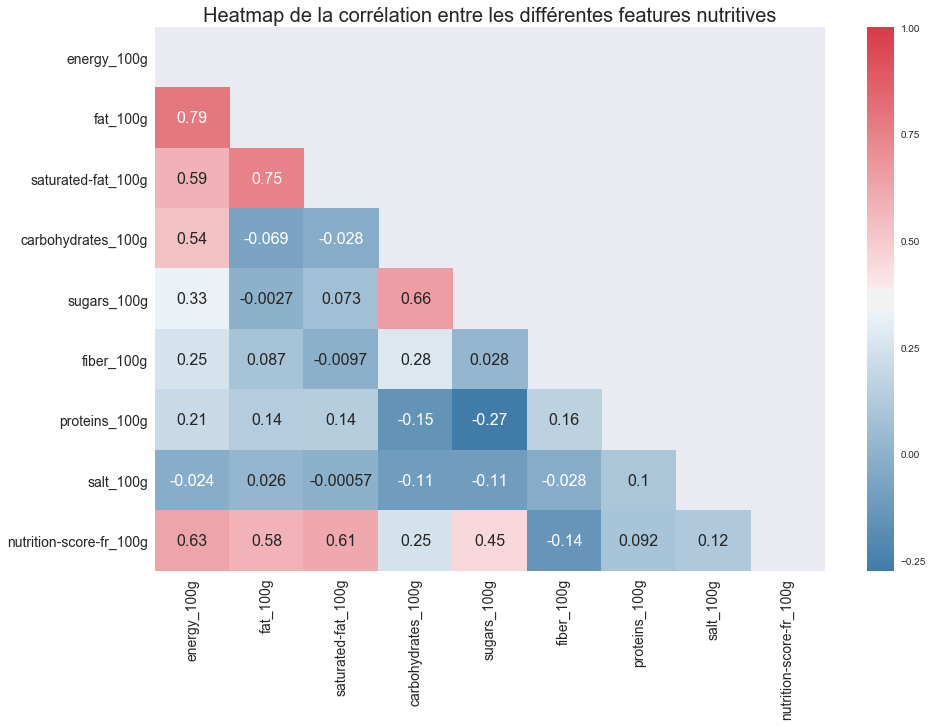

In [23]:
corr = df.corr()

# To mask upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size": 16})
ax.set_title("Heatmap de la corrélation entre les différentes features nutritives", size=20)
ax.tick_params(labelsize=14)
plt.show()

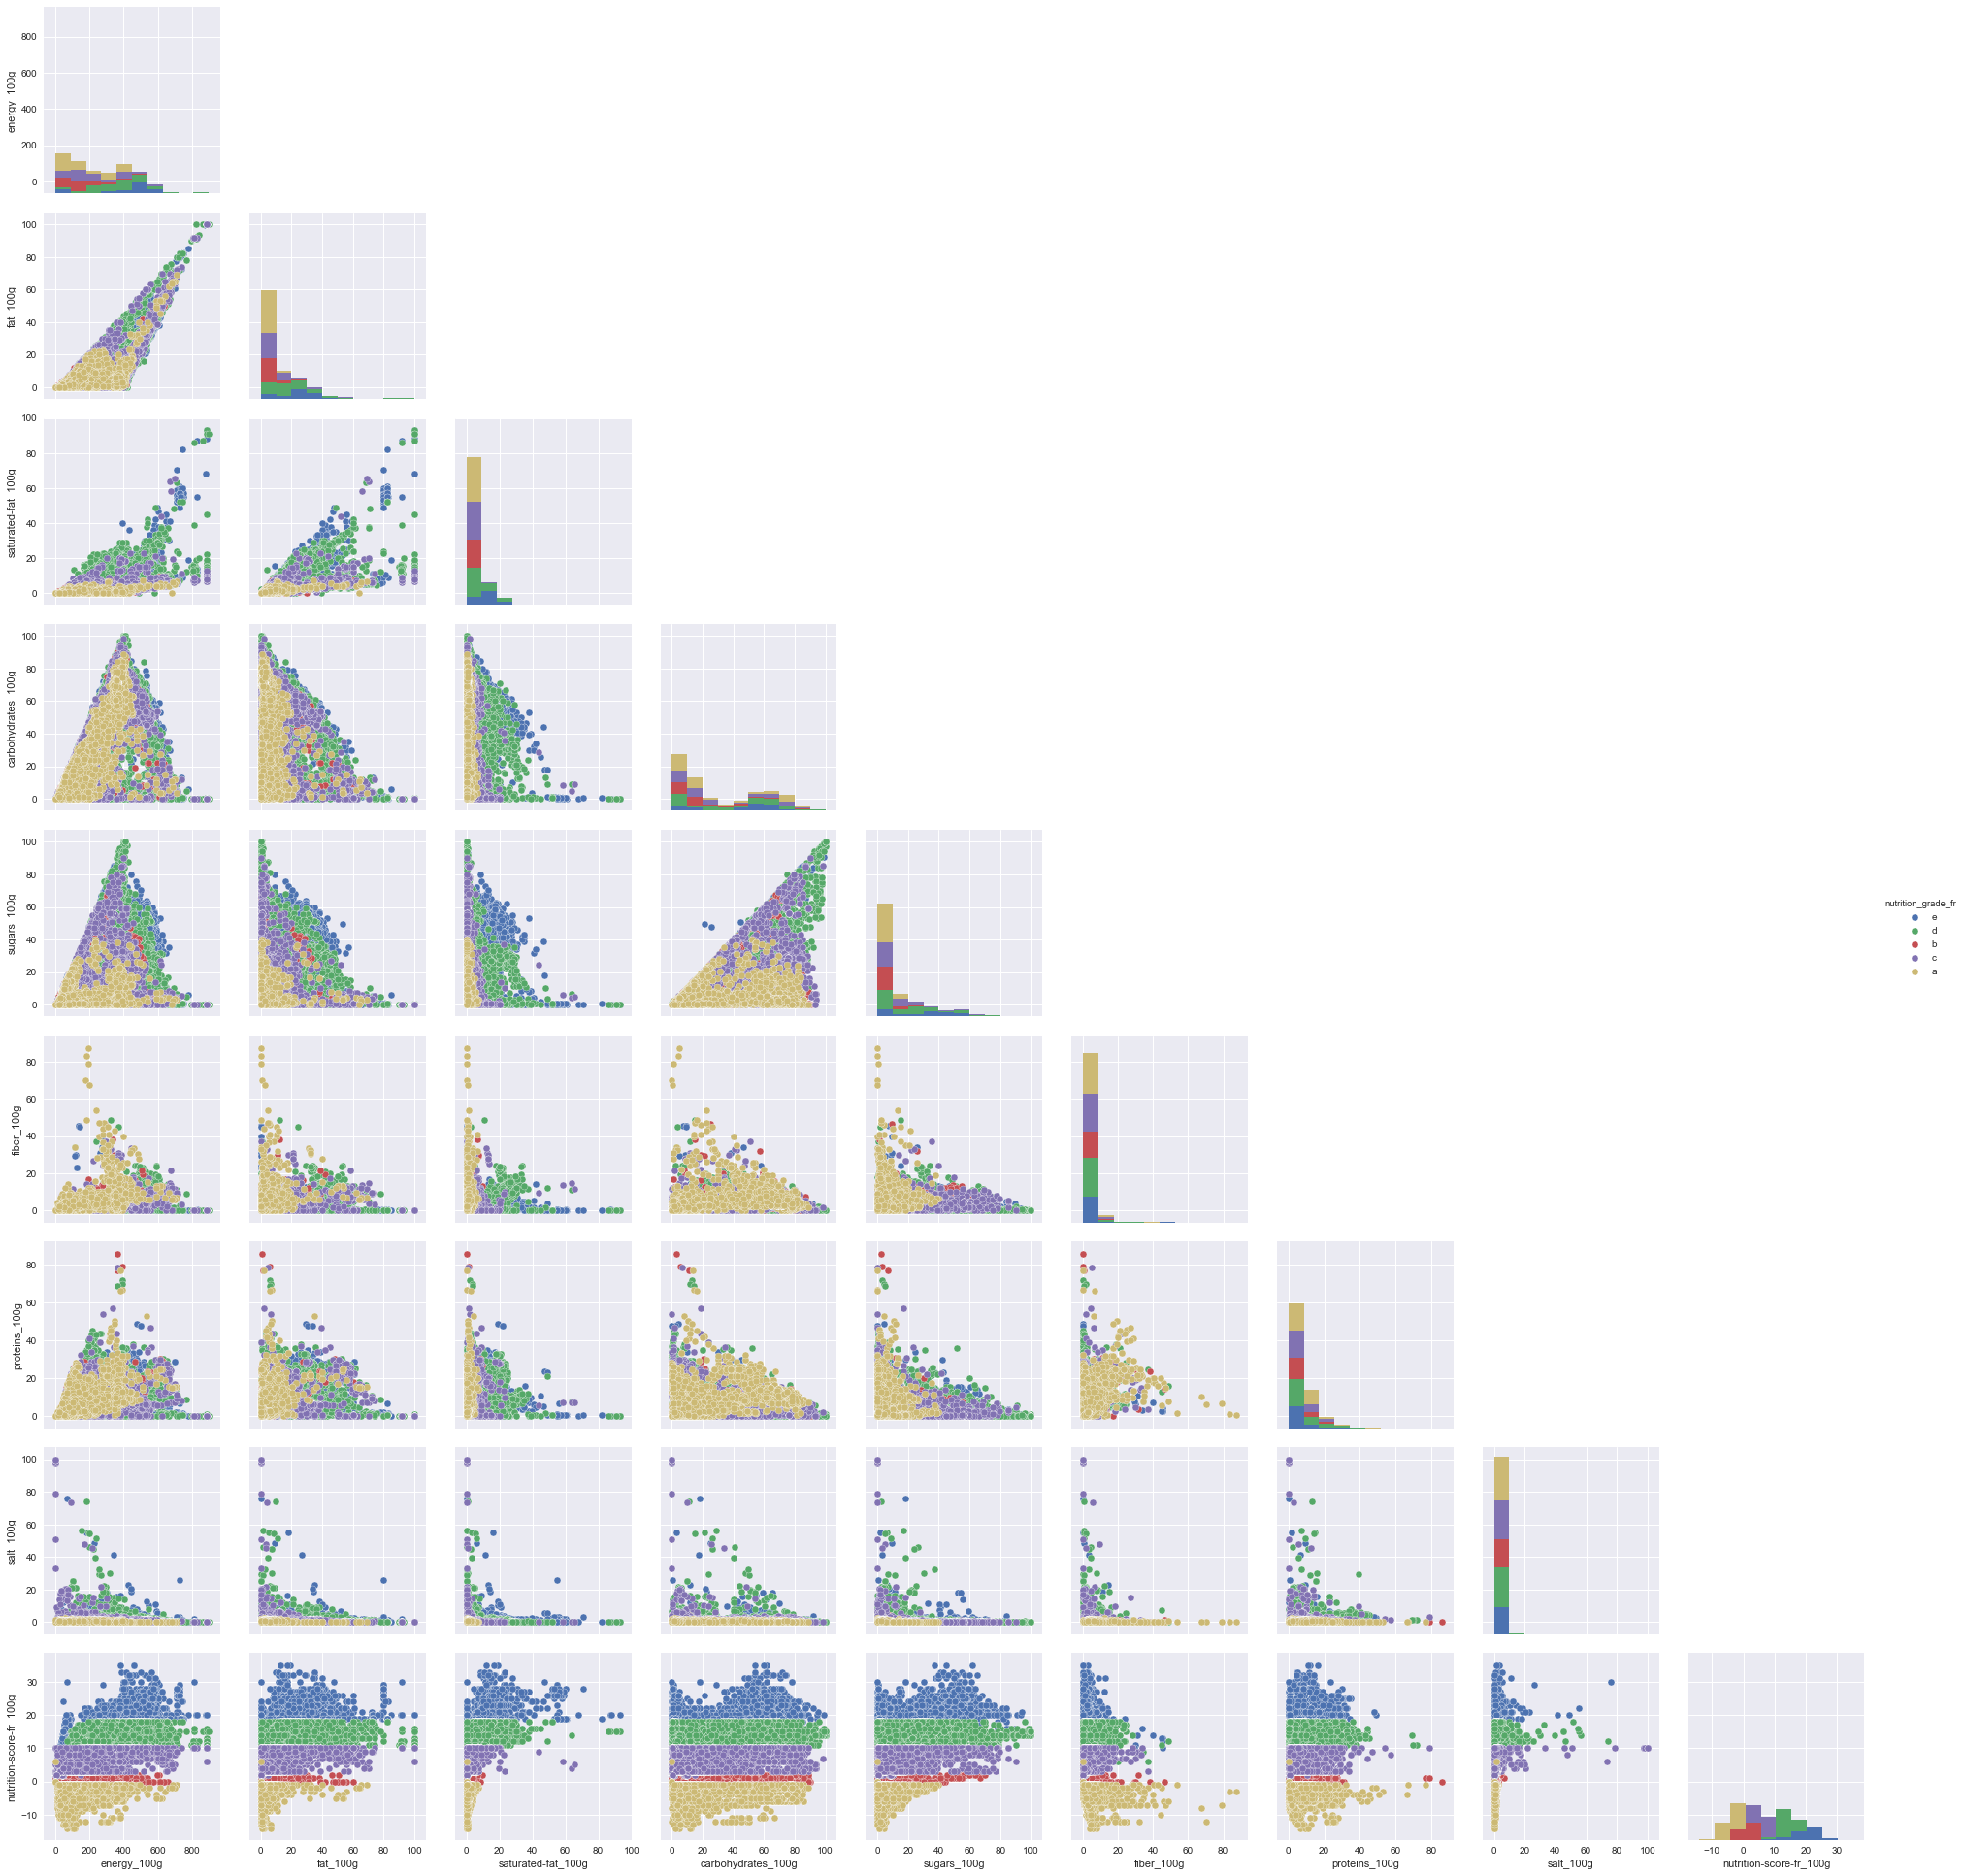

In [24]:
df_temp = df.loc[:, 'nutrition_grade_fr': 'nutrition-score-fr_100g'].drop('pnns_groups_1', axis=1).dropna()

g = sns.pairplot(df_temp, hue='nutrition_grade_fr', size=3)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

## 2/ Analyse bivariée entre variables nutritives

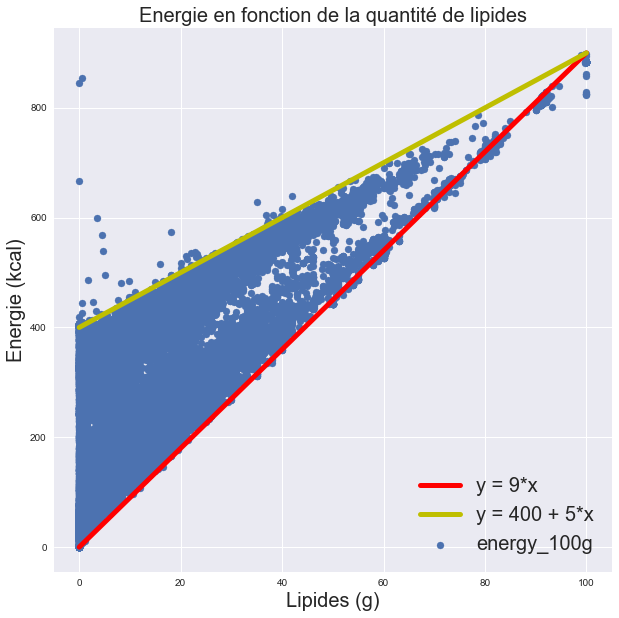

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 100)
y1 = 9*x
y2 = 400 + 5*x

ax.scatter(df['fat_100g'], df['energy_100g'])
ax.plot(x, y1, color='r', linewidth=5, label="y = 9*x")
ax.plot(x, y2, color='y', linewidth=5, label="y = 400 + 5*x")
ax.set(xlabel='Lipides (g)', ylabel='Energie (kcal)', 
       title="Energie en fonction de la quantité de lipides")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="lower right", prop={'size':20})

plt.show()

On observe que l'apport énergétique est très dépendant du taux de lipides, c'est pourquoi on a un coefficient de corrélation élevé (r=0.79) entre les 2 variables. Cela s'explique par le fait que les lipides sont les nutriments les plus denses (9 kcal/g contre 4 pour les glucides par exemple), donc ils déterminent en grande partie l'apport énergétique. L'apport énergétique est d'ailleurs compris entre des produits composés de lipides uniquement (droite du bas) et les produits composés de lipides et de glucides ou protéines (droite du haut). 

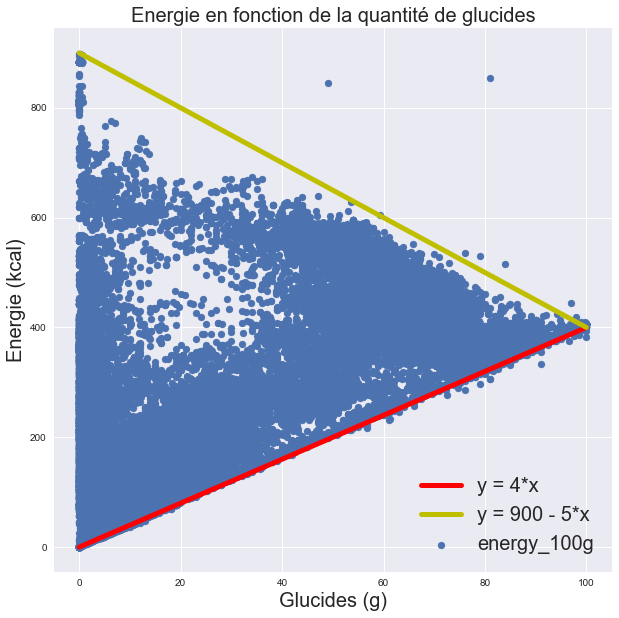

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 100)
y1 = 4*x
y2 = 900 - 5*x

ax.scatter(df['carbohydrates_100g'], df['energy_100g'])
ax.plot(x, y1, color='r', linewidth=5, label="y = 4*x")
ax.plot(x, y2, color='y', linewidth=5, label="y = 900 - 5*x")
ax.set(xlabel='Glucides (g)', ylabel='Energie (kcal)', 
       title="Energie en fonction de la quantité de glucides")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="lower right", prop={'size':20})


plt.show()

Les glucides sont la 2e source d'apport énergétique. On voit bien que la valeur énergétique est bornée d'une part par les produits qui ne contiennent que des glucides (droite du bas) et les produits composés de lipides et de glucides (droite du haut), dont la valeur énergétique diminue lorsque le taux de glucide augmente.

A noter: le trou autour de 20g de glucides et 400/500kcal, il y a très peu de produits dans cette zone là.

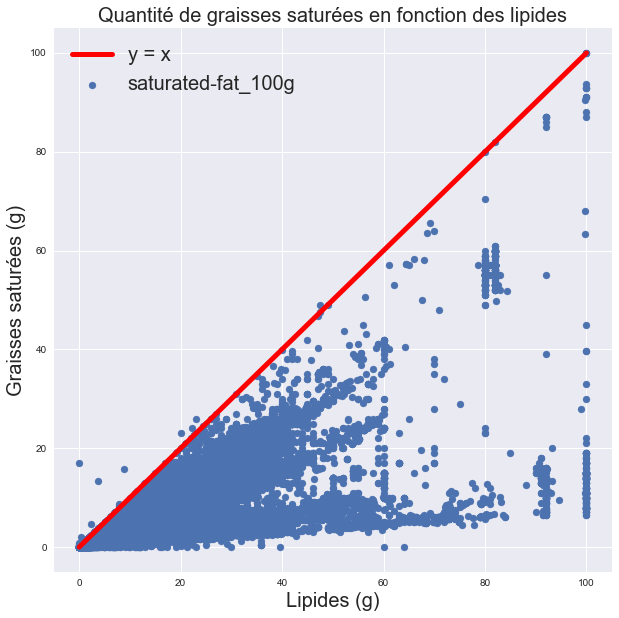

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 100)
y1 = x
y2 = 100 - 7.1*x

ax.scatter(df['fat_100g'], df['saturated-fat_100g'])
ax.plot(x, y1, color='r', linewidth=5, label='y = x')
#ax.plot(x, y2, color='r', linewidth=5)
ax.set(xlabel='Lipides (g)', ylabel='Graisses saturées (g)', 
       title="Quantité de graisses saturées en fonction des lipides")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="upper left", prop={'size':20})


plt.show()

On vérifie bien que le taux de graisses saturées est toujours inférieur au taux de lipides. Le coefficient de corrélation plutôt élevé de 0.75 s'explique par le fait que les graisses saturées sont des lipides. L'inverse par contre n'est pas vraie, et l'on peut avoir des produits avec beaucoup de lipides et peu de graisses saturées (par exemple l'huile d'olive).

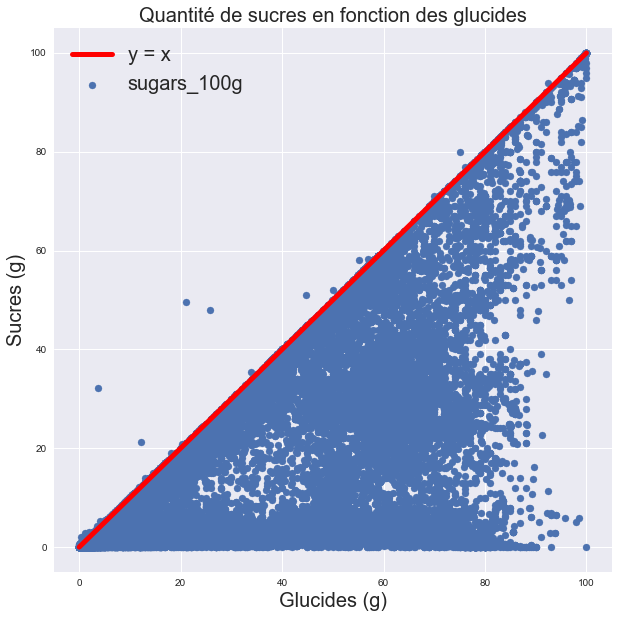

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

x = np.linspace(0, 100)
y1 = x
y2 = 100 - 7.1*x

ax.scatter(df['carbohydrates_100g'], df['sugars_100g'])
ax.plot(x, y1, color='r', linewidth=5, label="y = x")
#ax.plot(x, y2, color='r', linewidth=5)
ax.set(xlabel='Glucides (g)', ylabel='Sucres (g)', 
       title="Quantité de sucres en fonction des glucides")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
ax.legend(loc="upper left", prop={'size':20})


plt.show()

Comme pour les lipides et les graisses saturées, les sucres sont un type de glucides, ce qui explique le coefficient de corrélation un peu élevé (0.66). 

## 3/ Influence des variables nutritives sur le score nutritionnel

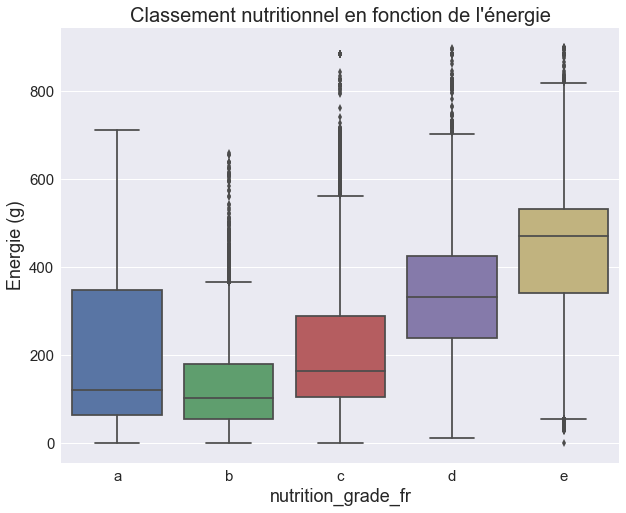

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='energy_100g', data=df, order=['a', 'b', 'c', 'd', 'e'])
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction de l'énergie", size=20)
ax.set_ylabel('Energie (g)')

plt.show()

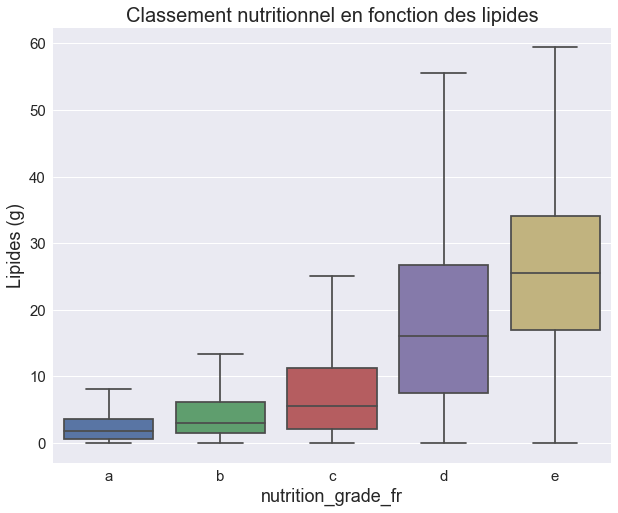

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='fat_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des lipides", size=20)
ax.set_ylabel('Lipides (g)')

plt.show()

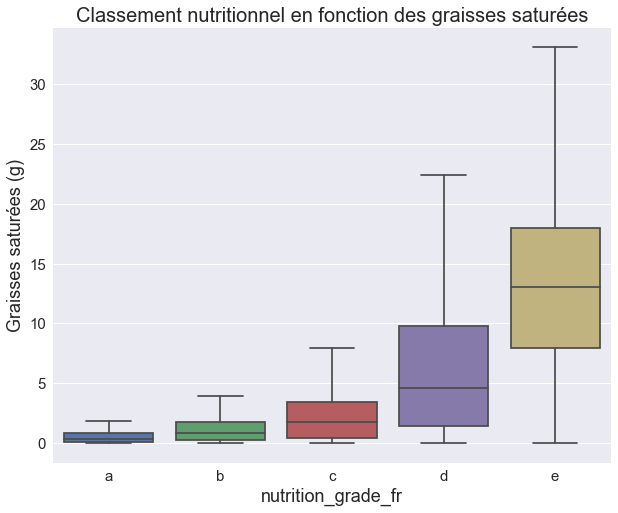

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='saturated-fat_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des graisses saturées", size=20)
ax.set_ylabel('Graisses saturées (g)')

plt.show()

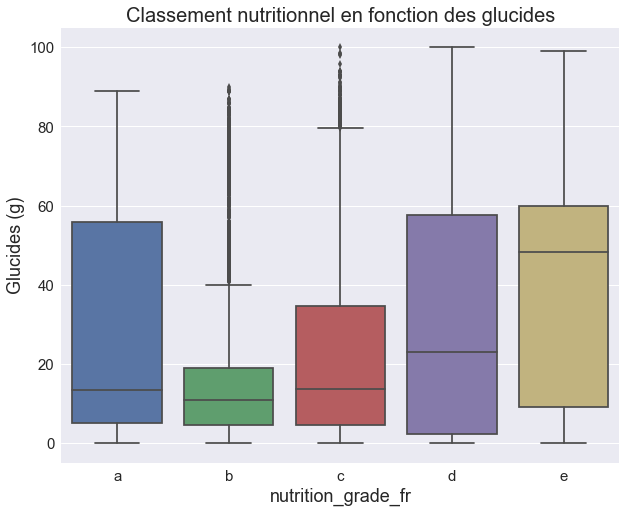

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='carbohydrates_100g', data=df, order=['a', 'b', 'c', 'd', 'e'])
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des glucides", size=20)
ax.set_ylabel('Glucides (g)')

plt.show()

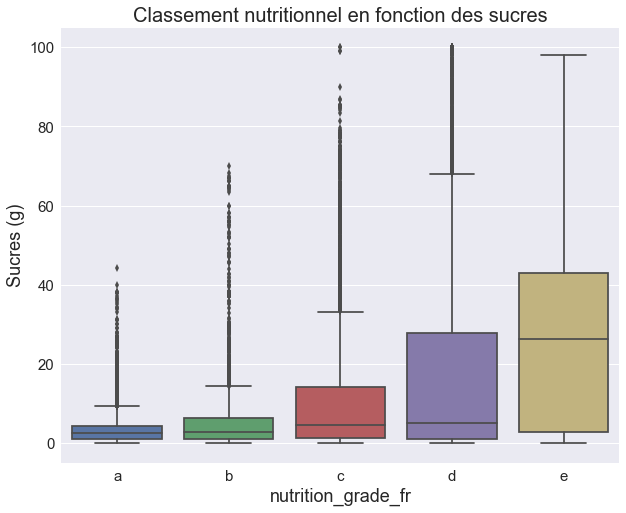

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='sugars_100g', data=df, order=['a', 'b', 'c', 'd', 'e'])
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des sucres", size=20)
ax.set_ylabel('Sucres (g)')

plt.show()

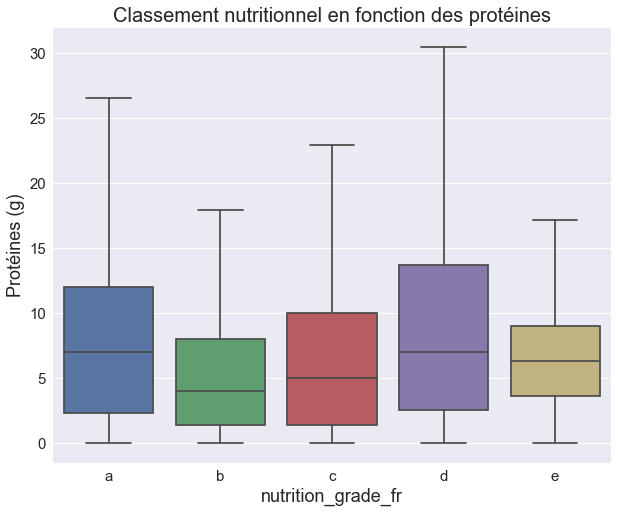

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='proteins_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des protéines", size=20)
ax.set_ylabel('Protéines (g)')

plt.show()

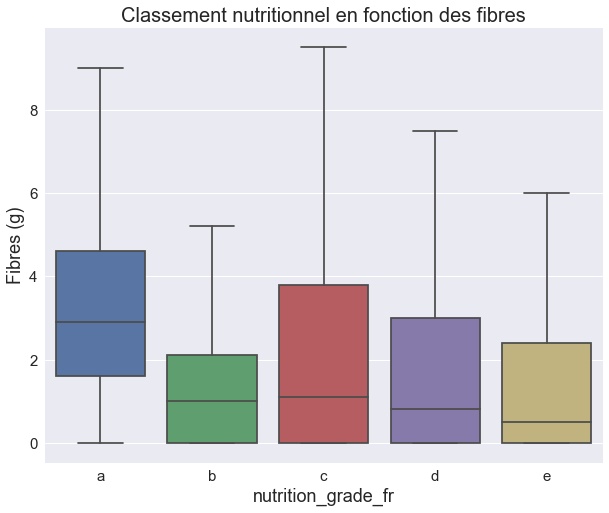

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='fiber_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction des fibres", size=20)
ax.set_ylabel('Fibres (g)')

plt.show()

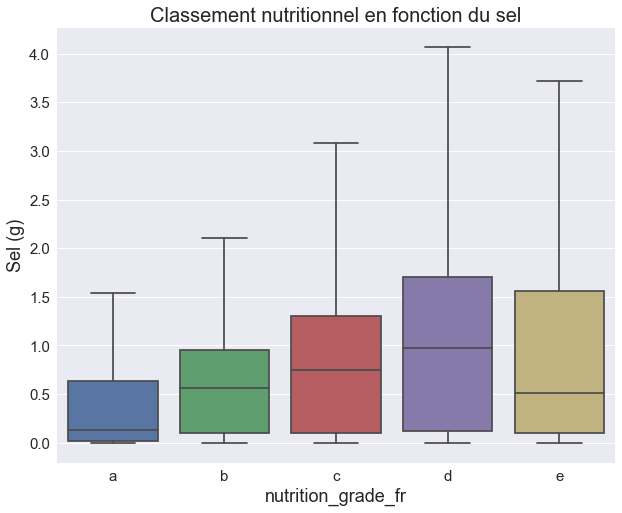

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.boxplot(x='nutrition_grade_fr', y='salt_100g', data=df, order=['a', 'b', 'c', 'd', 'e'], sym='')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(labelsize=15)
ax.set_title("Classement nutritionnel en fonction du sel", size=20)
ax.set_ylabel('Sel (g)')

plt.show()

## 4/ Analyse des catégories

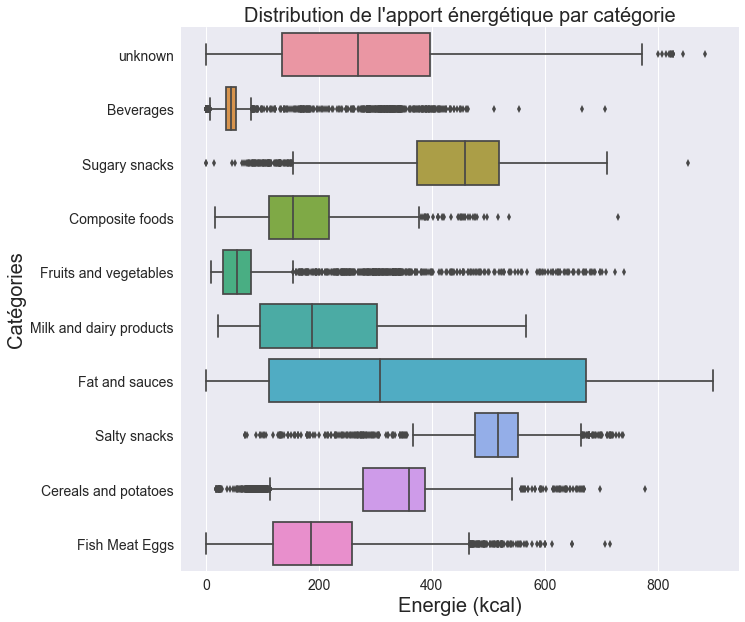

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='energy_100g', y='pnns_groups_1', data=df)
ax.set_title("Distribution de l'apport énergétique par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Energie (kcal)")
ax.tick_params(labelsize=14)

plt.show()

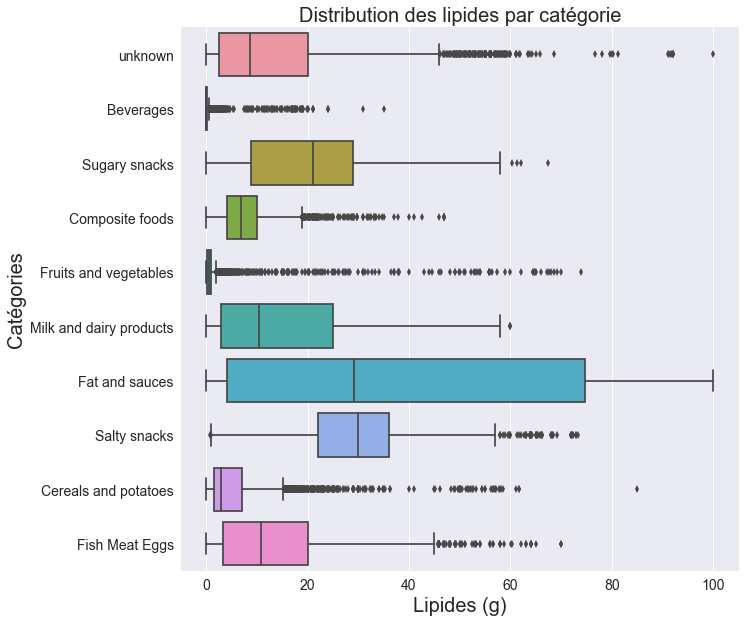

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='fat_100g', y='pnns_groups_1', data=df)
ax.set_title("Distribution des lipides par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Lipides (g)")
ax.tick_params(labelsize=14)

plt.show()

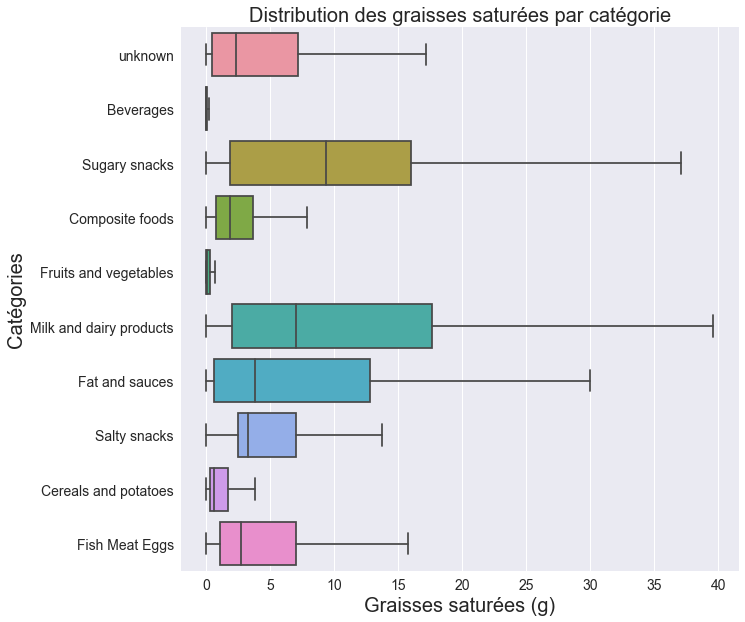

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='saturated-fat_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des graisses saturées par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Graisses saturées (g)")
ax.tick_params(labelsize=14)

plt.show()

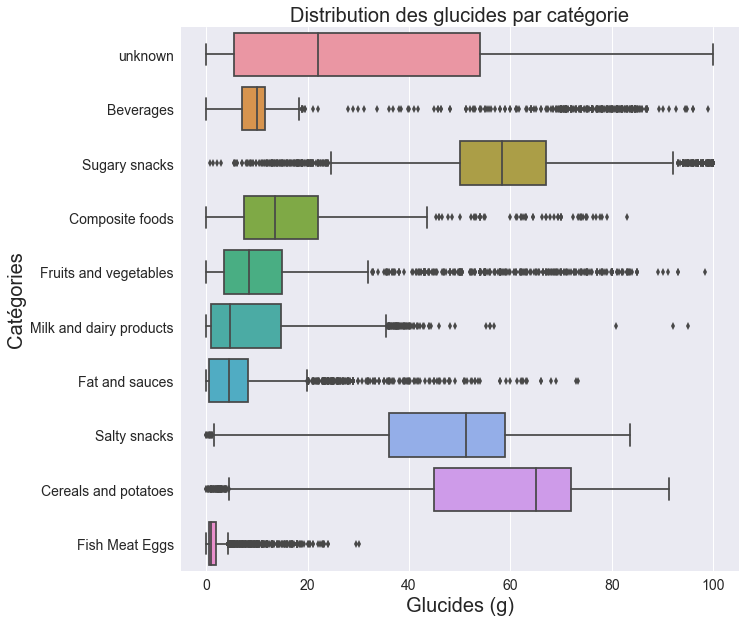

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='carbohydrates_100g', y='pnns_groups_1', data=df)
ax.set_title("Distribution des glucides par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Glucides (g)")
ax.tick_params(labelsize=14)

plt.show()

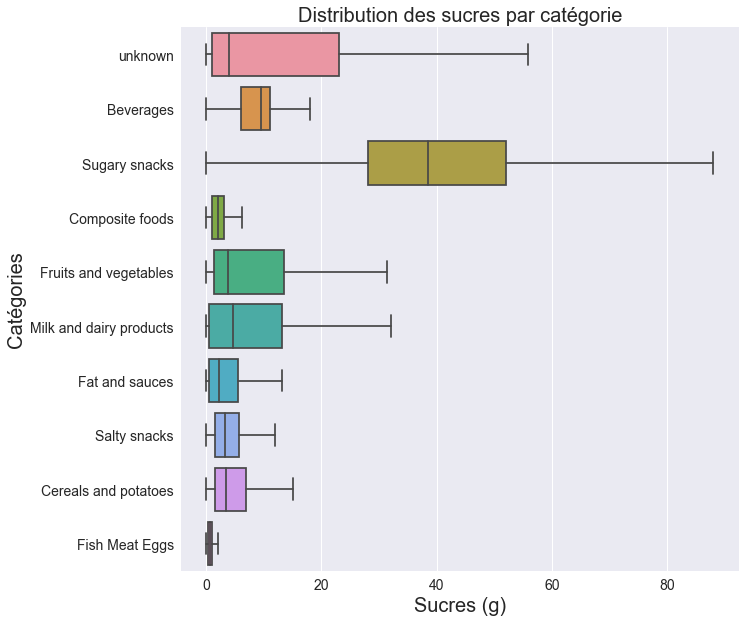

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='sugars_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des sucres par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Sucres (g)")
ax.tick_params(labelsize=14)

plt.show()

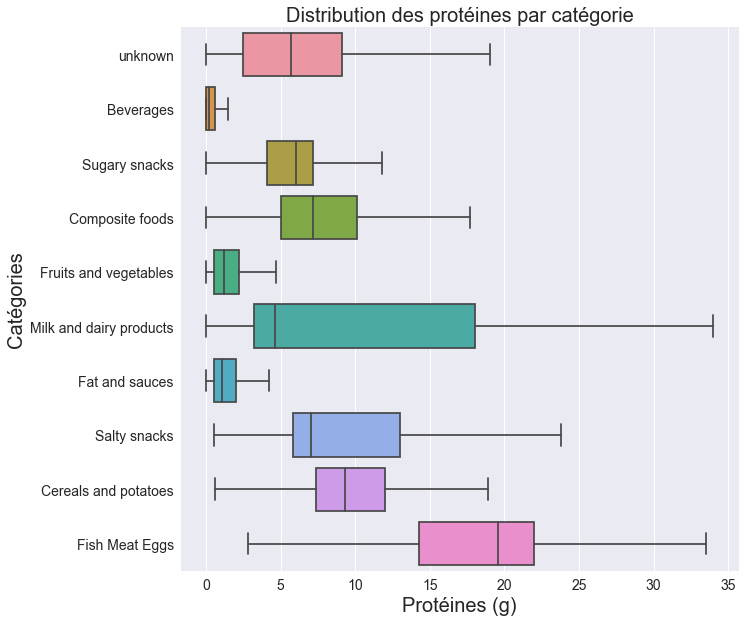

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='proteins_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des protéines par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Protéines (g)")
ax.tick_params(labelsize=14)

plt.show()

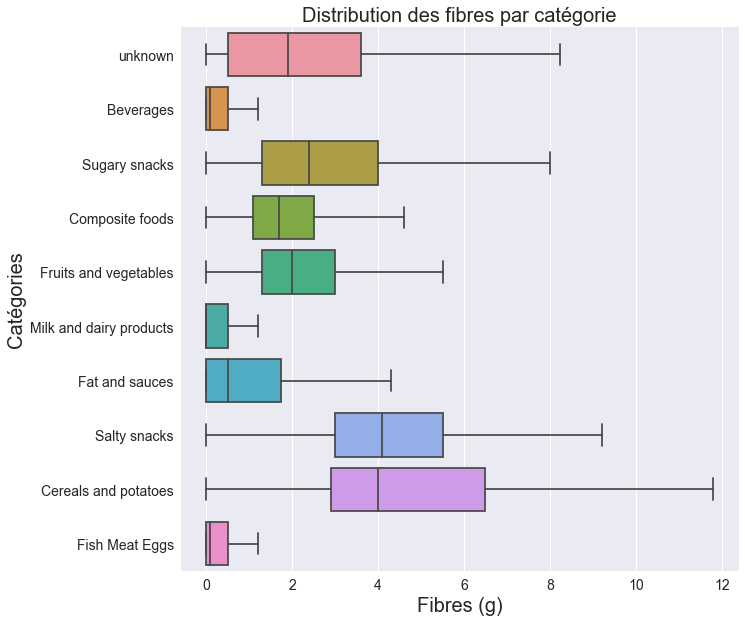

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='fiber_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution des fibres par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Fibres (g)")
ax.tick_params(labelsize=14)

plt.show()

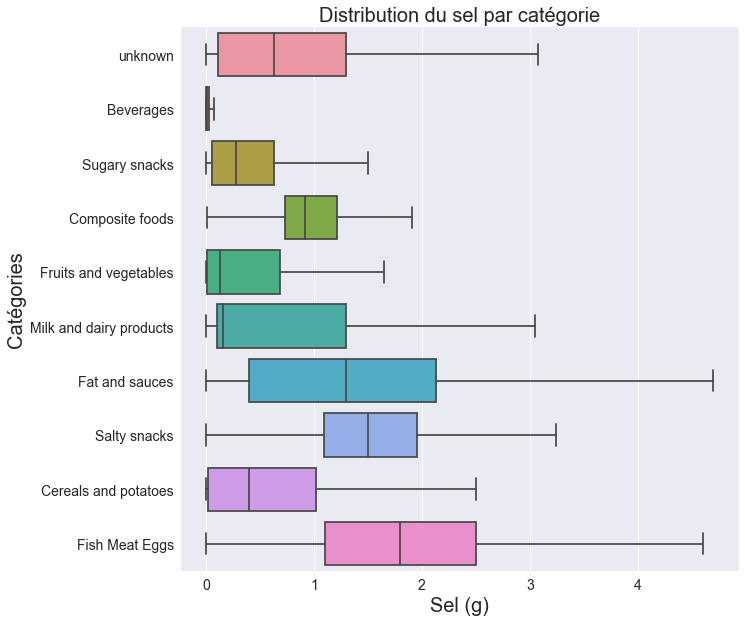

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.boxplot(x='salt_100g', y='pnns_groups_1', data=df, sym='')
ax.set_title("Distribution du sel par catégorie", size=20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel("Catégories")
ax.set_xlabel("Sel (g)")
ax.tick_params(labelsize=14)

plt.show()

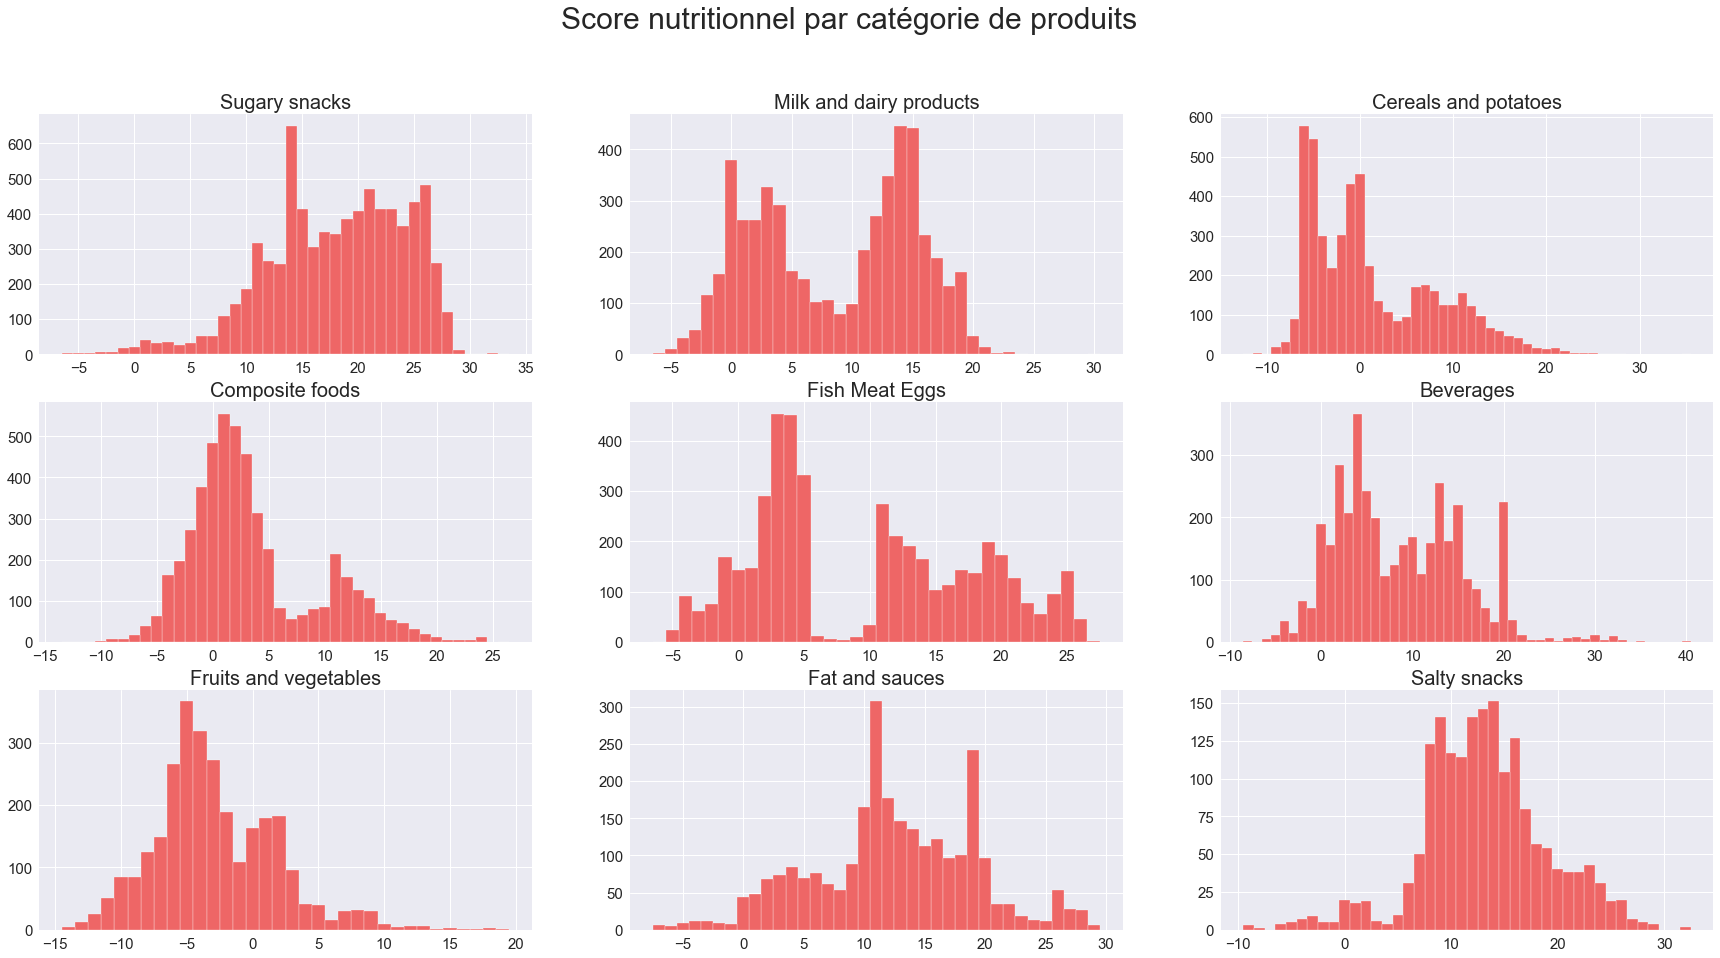

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))
fig.suptitle('Score nutritionnel par catégorie de produits', size=30)
idx = 0
for col in df['pnns_groups_1'].value_counts().index:
    if col != 'unknown':
        df_temp = df[df['pnns_groups_1'] == col]
        axes[idx // 3, idx % 3].bar(x=df_temp['nutrition-score-fr_100g'].value_counts().index, 
                                    height=df_temp['nutrition-score-fr_100g'].value_counts(), 
                                    color="#EE6666", edgecolor='white', width=1)   
        axes[idx // 3, idx % 3].set_title(f"{col}", size=20)
        axes[idx // 3, idx % 3].tick_params(labelsize=15)
        
        idx += 1

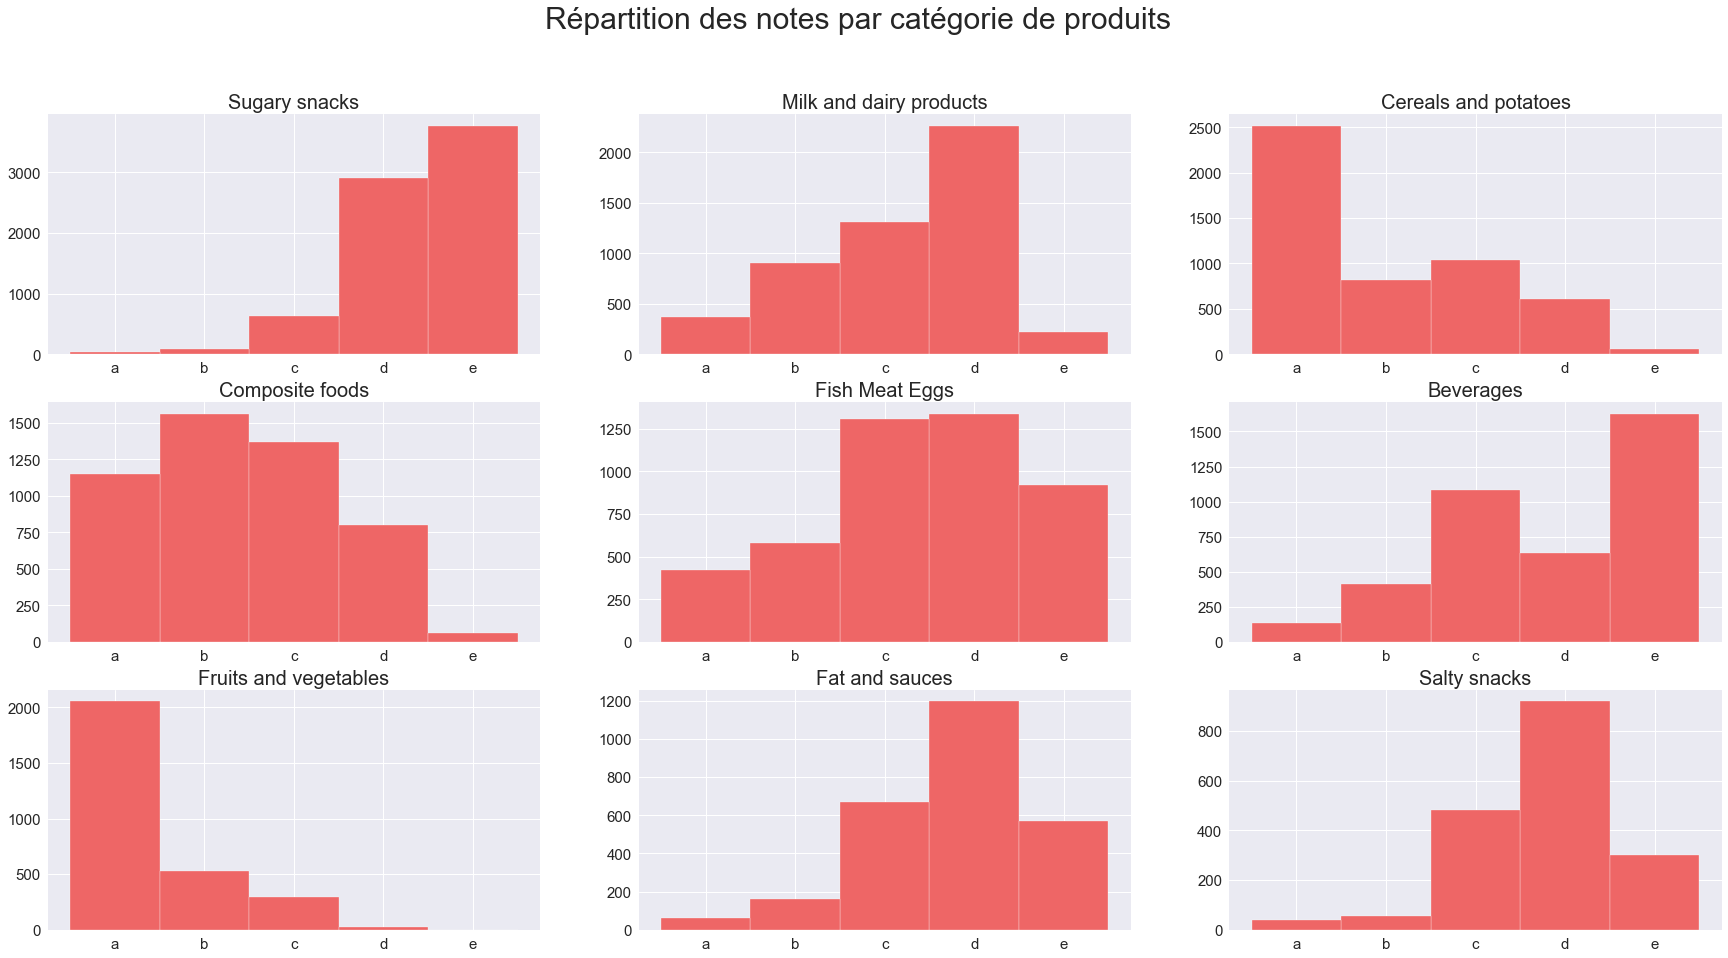

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(30, 15))
fig.suptitle('Répartition des notes par catégorie de produits', size=30)
idx = 0
for col in df['pnns_groups_1'].value_counts().index:
    if col != 'unknown':
        df_temp = df[df['pnns_groups_1'] == col]
        axes[idx // 3, idx % 3].bar(x=df_temp['nutrition_grade_fr'].value_counts().index, 
                                    height=df_temp['nutrition_grade_fr'].value_counts(), 
                                    color="#EE6666", edgecolor='white', width=1)   
        axes[idx // 3, idx % 3].set_title(f"{col}", size=20)
        axes[idx // 3, idx % 3].tick_params(labelsize=15)
        
        idx += 1

## 5/ Analyse des marques

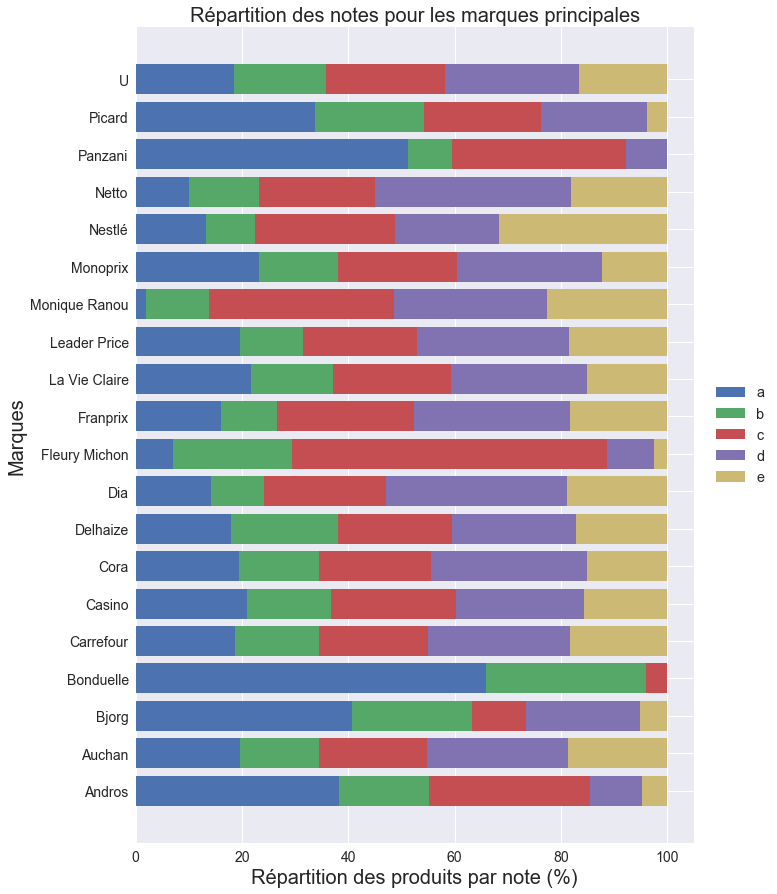

In [47]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.set_title("Répartition des notes pour les marques principales", size=20)

df2 = df[df.brands.isin(df['brands'].value_counts().index)]
brands = pd.DataFrame(df2['brands'].value_counts())

for grade in ['a', 'b', 'c', 'd', 'e']:
    brands[grade] = df2[df2['nutrition_grade_fr'] == grade]['brands'].value_counts() / brands['brands'] * 100
    brands[f"cum_{grade}"] = df2[df2['nutrition_grade_fr'] <= grade]['brands'].value_counts() / brands['brands'] * 100

brands.sort_values('brands', inplace=True, ascending=False)
df_temp2 = brands[:20]

for grade in ['a', 'b', 'c', 'd', 'e']:
    ax.barh(y=df_temp2.index, width=df_temp2[grade], left=(df_temp2[f"cum_{grade}"]-df_temp2[grade]), label=grade)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set(ylabel='Marques', xlabel='Répartition des produits par note (%)')
    ax.tick_params(labelsize=14)
    
    ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), fontsize='x-large')

plt.show()